Imports

In [122]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools


loading dataset

In [123]:
x_train, y_train, x_valid, y_valid, x_test ,y_test = [], [], [], [], [], []
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


defining the labels

In [124]:
LABEL_DICT = {
 1: "T-shirt/top",
 2: "Trouser",
 3: "Pullover",
 4: "Dress",
 5: "Coat",
 6: "Sandal",
 7: "Shirt",
 8: "Sneaker",
 9: "Bag",
 10: "Ankle boot"
}

showing 10 random image of dataset

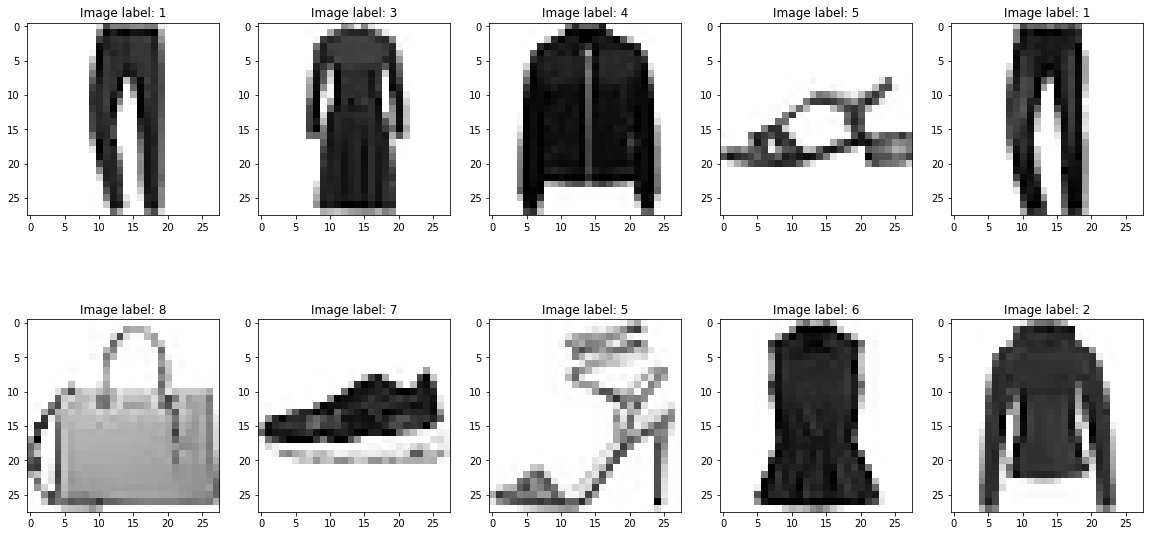

In [125]:
plt.figure(figsize=(20,10))
random_index= random.sample(range(0, 60000), 10)
for i, j in zip(random_index, range(10)):
    plt.subplot(2,5,j+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title('Image label: {}'.format(y_train[i]))
plt.show()


normalizing dataset and splitting dataset

In [126]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255


x_train = x_train.reshape(len(x_train),28,28)
x_test = x_test.reshape(10000,28,28)
x_valid = x_valid.reshape(len(x_valid),28,28)


x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_valid = x_valid.reshape(-1, 28*28)

print('x_train shape:', x_train.shape, '\nx_test shape:', x_test.shape, '\nx_valid shape:', x_valid.shape)

y_train =np_utils.to_categorical(y_train)
Y_test =np_utils.to_categorical(y_test)
y_valid =np_utils.to_categorical(y_valid)




x_train shape: (48000, 784) 
x_test shape: (10000, 784) 
x_valid shape: (12000, 784)


building the model

In [192]:
# BUILD THE MODEL
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))	

model.add(Dense(128 , activation='relu'))

model.add(Dense(128 , activation='relu'))

model.add(Dense(10 , activation='softmax'))

# compile it - categorical crossentropy is for multiple choice classification
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


traing the model

In [206]:
# Train
history = model.fit(x_train,
          y_train,
          epochs = 5,
          batch_size = 256,
          validation_data=(x_valid, y_valid))



Epoch 1/5
188/188 [==============================] - 6s 25ms/step - loss: 0.2327 - accuracy: 0.9127 - val_loss: 0.4608 - val_accuracy: 0.8852
Epoch 2/5
188/188 [==============================] - 4s 24ms/step - loss: 0.2263 - accuracy: 0.9150 - val_loss: 0.4049 - val_accuracy: 0.8914
Epoch 3/5
188/188 [==============================] - 4s 23ms/step - loss: 0.2168 - accuracy: 0.9165 - val_loss: 0.4673 - val_accuracy: 0.8846
Epoch 4/5
188/188 [==============================] - 4s 22ms/step - loss: 0.2143 - accuracy: 0.9188 - val_loss: 0.4515 - val_accuracy: 0.8824
Epoch 5/5
188/188 [==============================] - 4s 21ms/step - loss: 0.2086 - accuracy: 0.9211 - val_loss: 0.5720 - val_accuracy: 0.8737


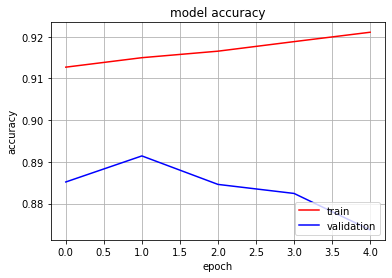

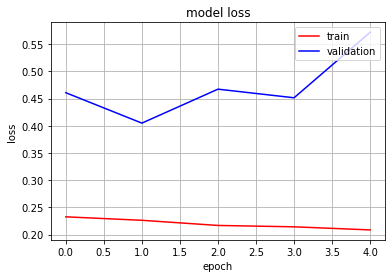

In [207]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Evaluating model

In [208]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test top 1 accuracy:', score[1])

Test loss: 0.6267722845077515
Test top 1 accuracy: 0.8722000122070312


Prediction and Confusion matrix

In [209]:
# Prediction Labels
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n",confusion_mtx)

confusion matrix=
 [[803   3   5  13   5   2 159   0  10   0]
 [  1 976   0  12   4   0   7   0   0   0]
 [ 17   2 625  11 253   0  90   1   1   0]
 [ 26  16   2 858  54   0  39   1   4   0]
 [  1   1  27  18 914   0  38   0   1   0]
 [  0   2   0   1   0 931   0  41   4  21]
 [ 87   2  53  22 117   0 711   0   8   0]
 [  0   0   0   0   0   3   0 972   0  25]
 [  3   0   0   4   7   1   9   5 971   0]
 [  0   1   0   0   0   2   1  35   0 961]]
